In [1]:
# Always a bit risky, but I think the chance for name space convolution is small 
import numpy as np
import scipy as sp
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import os
# For handling dates 
from mizani.breaks import date_breaks
from mizani.formatters import date_format

# A nice color palette for categorical data 
cbPalette = ["#E69F00", "#56B4E9", "#009E73", 
             "#0072B2", "#D55E00", 
             "#CC79A7", "#F0E442", "#999999"]

# Proportions when saving figures 
BASE_HEIGHT = 5
BASE_WIDTH = 7.0

# Directory for saving figures
dir_save = "./Figs/"
if not os.path.isdir(dir_save):
    os.mkdir(dir_save)

Let us start with fixing the bad example. The problem here is that the seasonal aspect is not considered in the original plot. As seen below Spain has lower unemployment.

C:\Users\me\AppData\Local\Temp\ipykernel_20472\1079287314.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Unemlpoyed_v1.png
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Unemlpoyed_v2.png


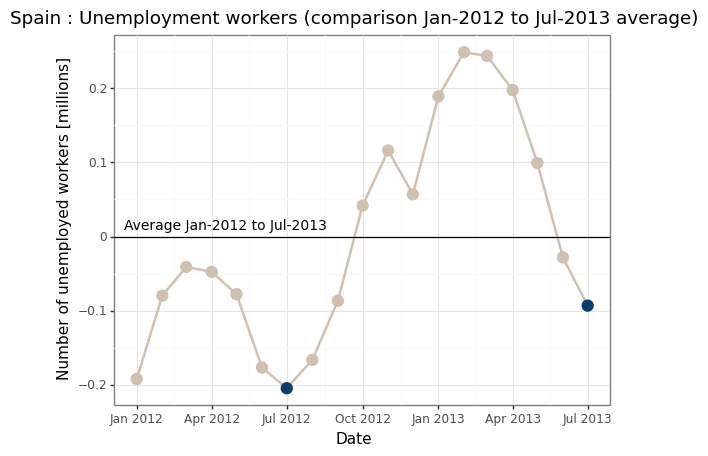

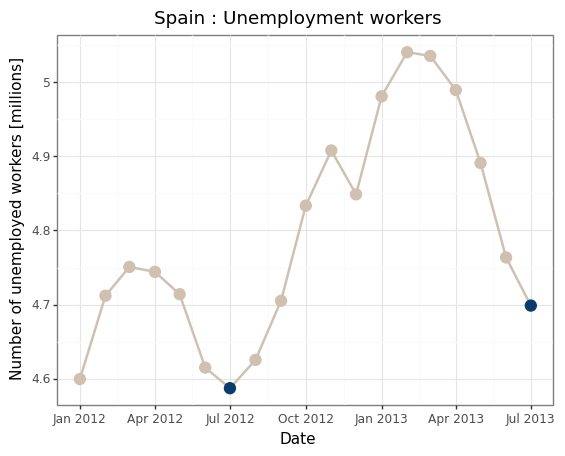

[<ggplot: (80134310928)>, <ggplot: (80134323965)>]

In [2]:

data_spain = pd.read_csv("Data/Spain_tidy.csv")

# Working with dates is always a pain 
data_2013_2014 = data_spain.query("(Year >= 2012) and DATE < '2013-07-30'")
data_2013_2014 = data_2013_2014.assign(DATE=pd.to_datetime(data_2013_2014["DATE"]))
data_2013_2014.reset_index(inplace=True)
data_2013_2014["Number_unemployed"] = data_2013_2014["Number_unemployed"] / 1e6
data_2013_2014["Index_unemployed"] = data_2013_2014["Number_unemployed"] - np.mean(data_2013_2014["Number_unemployed"])
data_2013_2014["Should_highlight"] = "Not"
data_2013_2014["Should_highlight"][data_2013_2014["Month"] == 7] = "Yes"

col_highlight = ["#D0C0B0", "#0A3D6B", "#B6C2CC", "#BEAAB4", "#ECE9CD", "#0D5C3D", "#812F02"]

p1 = (ggplot(data_2013_2014, aes("DATE", "Index_unemployed"))
    + geom_line(size=1.0, color = col_highlight[0])
    + geom_point(aes(color = "Should_highlight"), size=4.0)
    + geom_hline(yintercept=0.0)
    + annotate("text", x = '2012-04-18', y = 0.015, label = "Average Jan-2012 to Jul-2013", size=10.0)
    + scale_x_datetime(breaks=date_breaks('3 months'), labels=date_format('%b %Y'))
    + scale_color_manual(values=col_highlight)
    + labs(x = "Date", y = "Number of unemployed workers [millions]", title = "Spain : Unemployment workers (comparison Jan-2012 to Jul-2013 average)")
    + theme_bw()
    + theme(legend_position="none"))

p2 = (ggplot(data_2013_2014, aes("DATE", "Number_unemployed"))
    + geom_line(size=1.0, color = col_highlight[0])
    + geom_point(aes(color = "Should_highlight"), size=4.0)
    + scale_x_datetime(breaks=date_breaks('3 months'), labels=date_format('%b %Y'))
    + scale_color_manual(values=col_highlight)
    + labs(x = "Date", y = "Number of unemployed workers [millions]", title = "Spain : Unemployment workers")
    + theme_bw()
    + theme(legend_position="none"))

p1.save("Figs/Unemlpoyed_v1.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)
p2.save("Figs/Unemlpoyed_v2.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)

[p1, p2]

We can visualize time-series data with dots, but if we have multiple categories it is better to use lines. Notice, if we drop the points we put larger focus on the trend.

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Ex_time_v1.png
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Ex_time_v2.png
C:\Users\me\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Ex_time_v3.png
C:\Users\me\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


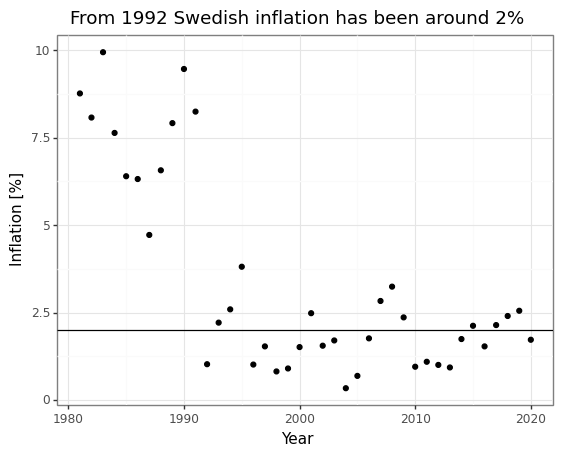

C:\Users\me\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


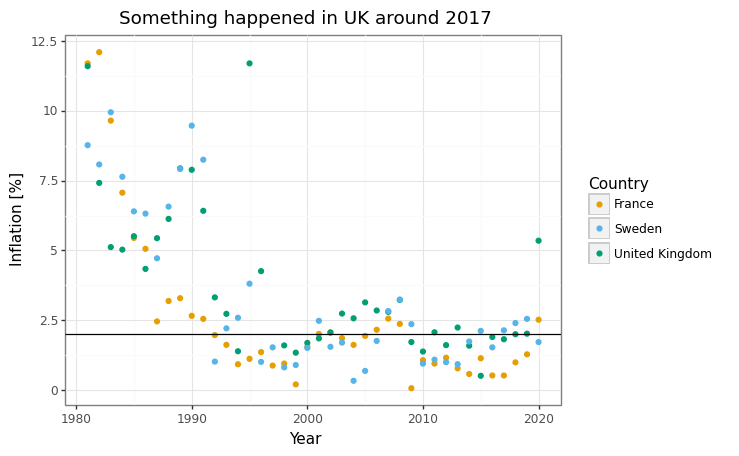

C:\Users\me\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


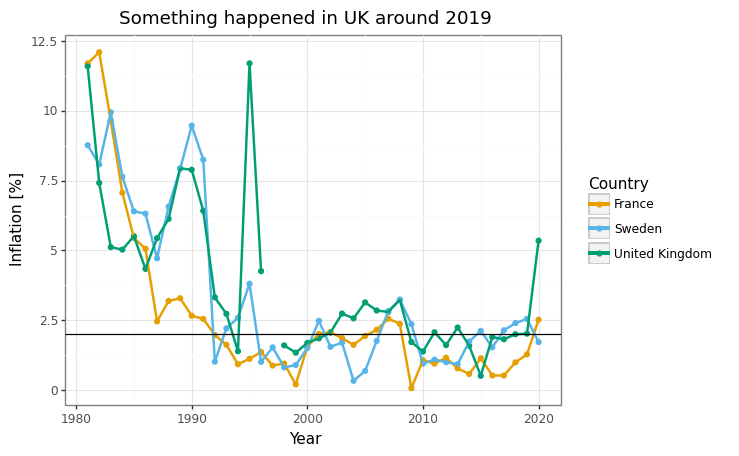

[<ggplot: (80135621807)>, <ggplot: (80135626864)>, <ggplot: (80135624738)>]

In [3]:
data_inflation = pd.read_csv("Data/Inflation.csv")

data_sweden = data_inflation.query("country == 'Sweden'")
p1 = (ggplot(data_sweden, aes("Year", "Inflation"))
    + geom_point(size=1.5)
    + geom_hline(yintercept=2.0)
    + labs(x = "Year", y = "Inflation [%]", title = "From 1992 Swedish inflation has been around 2%")
    + theme_bw())


p2 = (ggplot(data_inflation, aes("Year", "Inflation", color="country"))
    + geom_point(size=1.5)
    + geom_hline(yintercept=2.0)
    + scale_color_manual(values=cbPalette, name = "Country")
    + labs(x = "Year", y = "Inflation [%]", title = "Something happened in UK around 2017")
    + theme_bw())

p3 = (ggplot(data_inflation, aes("Year", "Inflation", color="country"))
    + geom_point(size=1.5)
    + geom_line(size=1.0)
    + geom_hline(yintercept=2.0)
    + scale_color_manual(values=cbPalette, name = "Country")
    + labs(x = "Year", y = "Inflation [%]", title = "Something happened in UK around 2019")
    + theme_bw())


p1.save("Figs/Ex_time_v1.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)
p2.save("Figs/Ex_time_v2.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)
p3.save("Figs/Ex_time_v3.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)

[p1, p2, p3]

When working with time-series data, and we want to see rate of change the most efficient approach is often to transform the data in some way. With this approach we clearly see the difference between France and Sweden.

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Change_v1.png
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Change_v2.png


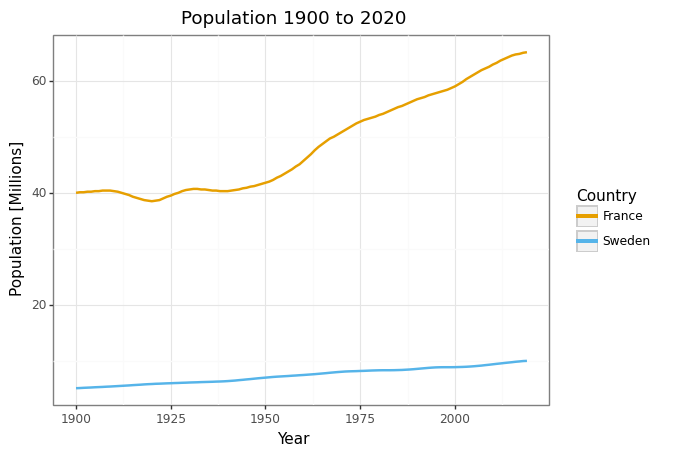

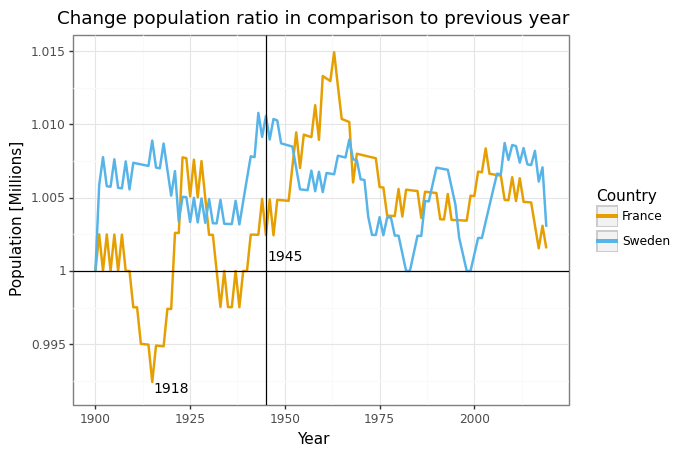

[<ggplot: (80137126265)>, <ggplot: (80137139746)>]

In [4]:
data_sweden = pd.read_csv("Data/Sweden_pop.csv")
data_france = pd.read_csv("Data/France_pop.csv")

data_sweden["Population"] = data_sweden["Population"] / 1e6
data_france["Population"] = data_france["Population"] / 1e6

# Here we compute the change ratio from previous to next year to clearly see if population 
# increase of decreases 
data_sweden["ratio_change"] = np.concatenate(([1.0], data_sweden["Population"][1::].to_numpy() / data_sweden["Population"][0:-1:].to_numpy()), axis=0)
data_france["ratio_change"] = np.concatenate(([1.0], data_france["Population"][1::].to_numpy() / data_france["Population"][0:-1:].to_numpy()), axis=0)

data_tot = pd.concat([data_sweden, data_france])

p1 = (ggplot(data_tot, aes("Year", "Population", color = "country"))
    + geom_line(size=1.0)
    + labs(y = "Population [Millions]", title = "Population 1900 to 2020")
    + scale_color_manual(values=cbPalette, name = "Country")
    + theme_bw())

p2 = (ggplot(data_tot, aes("Year", "ratio_change", color = "country"))
    + geom_line(size=1.0)
    + geom_hline(yintercept=1.0)
    + scale_color_manual(values=cbPalette, name = "Country")
    + annotate("text", x = 1920, y = 0.992, label = "1918", size=10.0)
    + annotate("text", x = 1950, y = 1.001, label = "1945", size=10.0)
    + geom_vline(xintercept=1945)
    + labs(y = "Population [Millions]", title = "Change population ratio in comparison to previous year")
    + theme_bw())

p1.save("Figs/Change_v1.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)
p2.save("Figs/Change_v2.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)

[p1, p2]


When working with exponentially growing data a log-axis might and often is crucial.

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Growth_rate_v1.png
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Growth_rate_v2.png


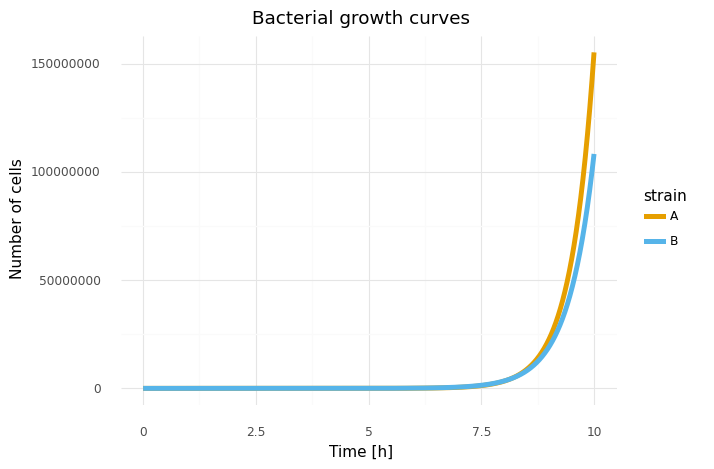

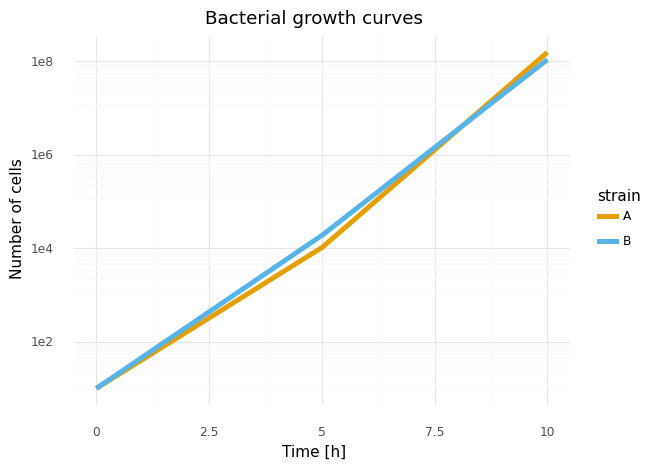

[<ggplot: (80137890810)>, <ggplot: (80137895705)>]

In [5]:
data_growth = pd.read_csv("Data/Growth_rate.csv")

p1 = (ggplot(data_growth, aes("t", "N", color = "strain"))
    + geom_line(size=2.0)
    + scale_color_manual(values=cbPalette)
    + labs(x = "Time [h]", y = "Number of cells", title = "Bacterial growth curves")
    + theme_minimal())

p2 = (ggplot(data_growth, aes("t", "N", color = "strain"))
    + geom_line(size=2.0)
    + scale_y_log10()
    + scale_color_manual(values=cbPalette)
    + labs(x = "Time [h]", y = "Number of cells", title = "Bacterial growth curves")
    + theme_minimal())

p1.save("Figs/Growth_rate_v1.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)
p2.save("Figs/Growth_rate_v2.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)
[p1, p2]

And when working with many categories do not underestimate the power of facets:

Månad  Örebro       City   Cost  Cost_grey
0    2018-10-01   23752  Stockholm  70363      70363
1    2018-10-01   23752       Umeå  27082      27082
2    2018-10-01   23752    Uppsala  36225      36225
3    2018-10-01   23752   Västerås  21765      21765
4    2018-10-01   23752   Göteborg  47630      47630
..          ...     ...        ...    ...        ...
427  2022-09-01   28249   Göteborg  49590      49590
428  2022-09-01   28249  Linköping  35038      35038
429  2022-09-01   28249      Malmö  34828      34828
430  2022-09-01   28249     Kalmar  25175      25175
431  2022-09-01   28249    Gotland  41931      41931

[432 rows x 5 columns]

Månad  Örebro       City   Cost  Cost_grey
0    2018-10-01   23752  Stockholm  70363      70363
1    2018-10-01   23752       Umeå  27082      27082
2    2018-10-01   23752    Uppsala  36225      36225
3    2018-10-01   23752   Västerås  21765      21765
4    2018-10-01   23752   Göteborg  47630      47630
..          ...     ...        ...    ...        ...
427  2022-09-01   28249   Göteborg  49590      49590
428  2022-09-01   28249  Linköping  35038      35038
429  2022-09-01   28249      Malmö  34828      34828
430  2022-09-01   28249     Kalmar  25175      25175
431  2022-09-01   28249    Gotland  41931      41931

[432 rows x 5 columns]

Månad  Örebro   Cost  Cost_grey  City_copy
0    2018-10-01   23752  70363      70363  Stockholm
1    2018-10-01   23752  27082      27082       Umeå
2    2018-10-01   23752  36225      36225    Uppsala
3    2018-10-01   23752  21765      21765   Västerås
4    2018-10-01   23752  47630      47630   Göteborg
..          ...     ...    ...        ...        ...
427  2022-09-01   28249  49590      49590   Göteborg
428  2022-09-01   28249  35038      35038  Linköping
429  2022-09-01   28249  34828      34828      Malmö
430  2022-09-01   28249  25175      25175     Kalmar
431  2022-09-01   28249  41931      41931    Gotland

[432 rows x 5 columns]

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning:

Saving 7.0 x 5 in image.

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning:

Filename: Figs/Housing.png

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning:

Saving 17.5 x 5 in image.

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning:

Filename: Figs/Housing_nice.png



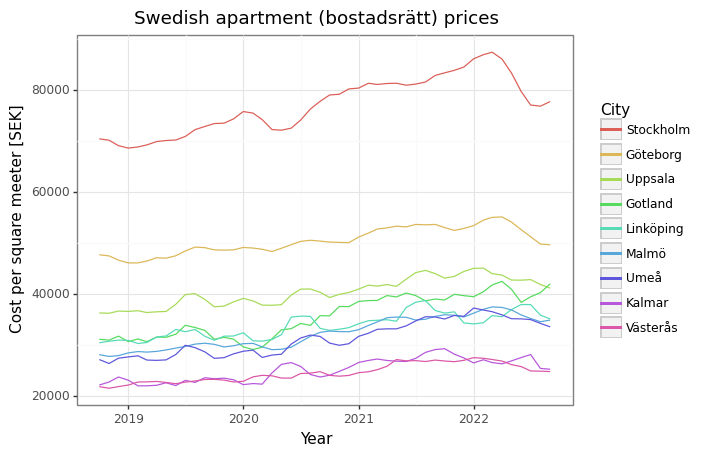

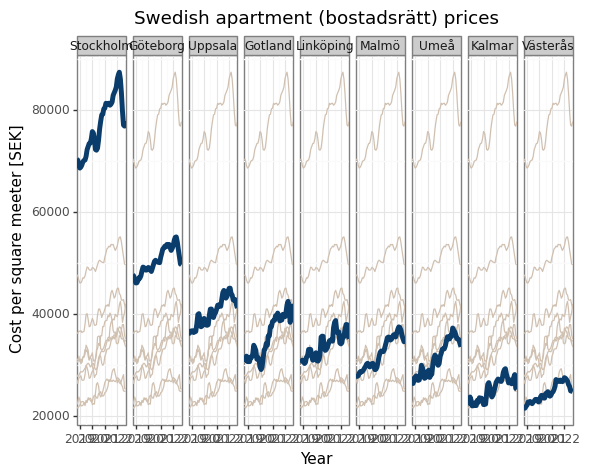

[<ggplot: (80137296863)>, <ggplot: (80136386868)>]

In [15]:
data_housing = pd.read_csv("Data/Housing_sweden.csv")
display(data_housing)
data_housing = data_housing.assign(City=pd.Categorical(data_housing["City"], 
                                                       categories=["Stockholm", "Göteborg", "Uppsala", "Gotland", "Linköping", "Malmö", "Umeå", "Kalmar", "Västerås"]))
display(data_housing)
df2 = data_housing.copy() # Create a copy for the facet
df2["City_copy"] = df2["City"]
df2 = df2.drop("City", axis=1)
display(df2)

p1 = (ggplot(data_housing, aes("Månad", "Cost", color = "City"))
    + geom_line(aes(group="City"))
    + scale_x_datetime(breaks=date_breaks('1 year'), labels=date_format('%Y'))
    + labs(x = "Year", y = "Cost per square meeter [SEK]", title = "Swedish apartment (bostadsrätt) prices")
    + theme_bw())


p2 = (ggplot(data_housing, aes("Månad", "Cost"))
    + geom_line(data=df2, mapping=aes(x="Månad", y="Cost", group="City_copy"), size=0.5, color=col_highlight[0])
    + geom_line(aes(group="City"), size=2.0, color=col_highlight[1])
    + facet_wrap("~City", nrow=1)
    + labs(x = "Year", y = "Cost per square meeter [SEK]", title = "Swedish apartment (bostadsrätt) prices")
    + scale_x_datetime(breaks=date_breaks('1 year'), labels=date_format('%Y'), expand=(0, 0))
    + theme_bw())

p1.save("Figs/Housing.png", width=BASE_WIDTH*1.0, height=BASE_HEIGHT)
p2.save("Figs/Housing_nice.png", width=BASE_WIDTH*2.5, height=BASE_HEIGHT)
[p1, p2]

## Associations 

Often when working with data we are interested in identifying associations, but, it should always be remembered that correlation is not causation.

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Chocolate.png


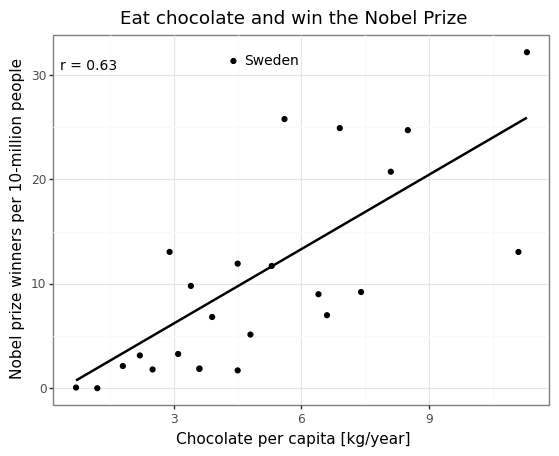

<ggplot: (80142033333)>

In [7]:
data1 = pd.DataFrame({"Country" : ["Australia", "Austria", "Belgium", "Brazil", "Canada", "China", "Croatia", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Japan", "Netherlands", "Norway", "Poland", "Portugal", "Romania", "Spain", "Sweden", "Switzerland", "UK", "USA"],
                      "Chocolate_consumption" : [4.8, 8.5, 6.4, 1.2, 3.9, 0.7, 6.6, 6.9, 8.8, 7.4, 3.4, 11.1, 2.5, 2.9, 8.8, 3.1, 1.8, 4.5, 5.6, 2.2, 3.6, 3.6, 4.5, 4.4, 11.3, 8.1, 5.3],
                      "Coffe_consumption" : [2.6, 5.5, 4.9, 4.8, 3.4, 1.2, 3.8, 5.3, 4.2, 9.6, 3.2, 5.2, 2.4, 3.1, 2.1, 3.4, 1.5, 6.7, 7.2, 3.1, 2.6, 1.9, 3.0, 9.8, 3.9, 1.7, 3.1],
                      "Nobel_laureates" : [12, 21, 10, 0, 24, 9, 3, 14, 0, 5, 63, 108, 2, 13, 7, 20, 27, 20, 13, 12, 2, 4, 8, 30, 26, 133, 375], 
                      "Pop2013" : [23342553, 8495145, 11104476, 200361925, 35181704, 1385566537, 4289714, 5619096, 1287251, 5426323, 64291280, 82726626, 11127990, 9954941, 4627173, 60990277, 127143577, 16759229, 5042671, 38216635, 10608156, 21698585, 46926963, 9571105, 8077833, 64130000, 320050716]})

data1["Wins_norm"] = data1["Nobel_laureates"] / (data1["Pop2013"]) * 1e7
data1 = data1.query("Country != 'Ireland'")
data1 = data1.query("Country != 'Estonia'")

# R-value is a linear regression goodness of fit value 
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(data1["Wins_norm"], data1["Chocolate_consumption"])

p1 = (ggplot(data1, aes("Chocolate_consumption", "Wins_norm"))
    + geom_point()
    + geom_smooth(method="lm", se=False)
    + annotate("text", x = 1, y = 31, label = "r = 0.63", size=10.0)
    + annotate("text", x = 5.3, y = 31.4, label = "Sweden", size=10.0)
    + labs(x = "Chocolate per capita [kg/year]", y = "Nobel prize winners per 10-million people", title = "Eat chocolate and win the Nobel Prize")
    + theme_bw())

p1.save("Figs/Chocolate.png", width=BASE_WIDTH, height=BASE_HEIGHT)

p1 

Now let us see if we can use our skills to hunt down **why** Finland is such a happy country.

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Scatter_ex1.png
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Scatter_ex2.png


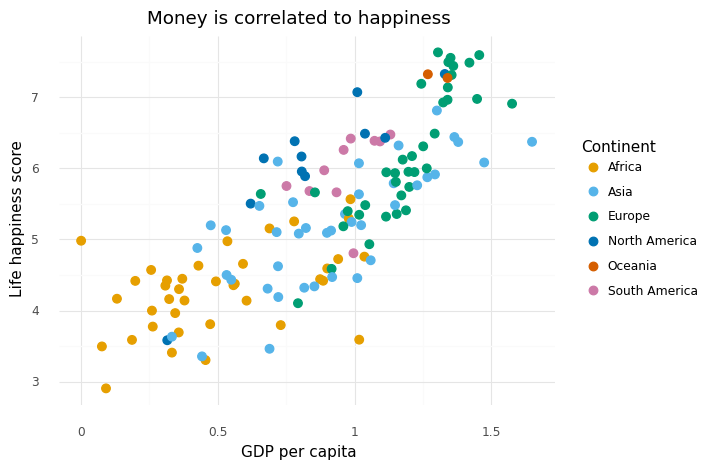

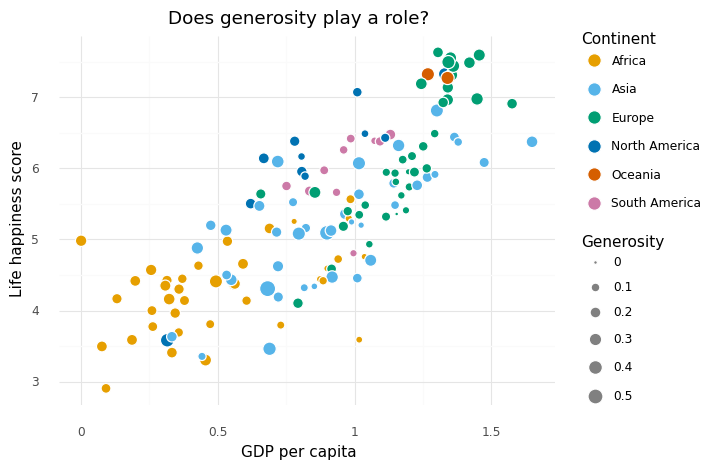

[<ggplot: (80135524708)>, <ggplot: (80137902824)>]

In [8]:
data_2018 = pd.read_csv("Data/World_2018.csv")

p1 = (ggplot(data_2018, aes("GDP_per_capita", "Score", color="continent"))
    + geom_point(size=3.0)
    + scale_color_manual(values=cbPalette, name = "Continent")
    + labs(x = "GDP per capita", y = "Life happiness score", title = "Money is correlated to happiness")
    + theme_minimal())

# Let see if we can include additional variable
p2 = (ggplot(data_2018, aes("GDP_per_capita", "Score", size="Generosity", fill="continent"))
    + geom_point(color="white")
    + labs(x = "GDP per capita", y = "Life happiness score", title = "Does generosity play a role?")
    + scale_fill_manual(values=cbPalette, name = "Continent")
    + theme_minimal()
    + guides(fill=guide_legend(override_aes={"size": 5}), # This fixes the size of the legend-dots
             size=guide_legend(override_aes={"fill": "grey"}))) # This fixes the fill of the grey dots 

p1.save("Figs/Scatter_ex1.png", width=BASE_WIDTH, height=BASE_HEIGHT)
p2.save("Figs/Scatter_ex2.png", width=BASE_WIDTH, height=BASE_HEIGHT)

[p1, p2]

With more than two variables it is pretty hard to obtain any wisdom from a scatter plot. But do not despair, we can use the scatter plot matrix for this. Below we will build the matrix ourselves, but in practice there are many plotting libraries which have natural support for these in [Python](https://plotly.com/python/splom/) and [R](https://www.r-bloggers.com/2021/06/ggpairs-in-r-a-brief-introduction-to-ggpairs/).

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Scatter_matrix.png


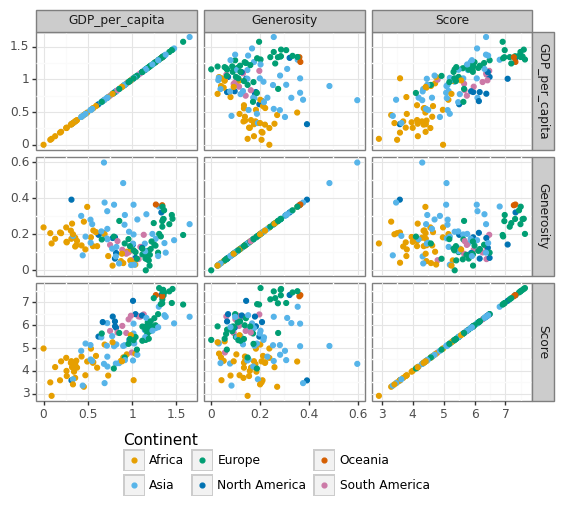

<ggplot: (80134327739)>

In [9]:
# Here we build a DataFrame we can turn into a score matrix 
var_plot = ["GDP_per_capita", "Score", "Generosity"]
df_tmp1 = data_2018[["name", "continent"] + var_plot]
df_tmp = df_tmp1.melt(id_vars=["name", "continent"], value_vars=var_plot, value_name="val_x", var_name="var_x") 
df_tmp = df_tmp.merge(df_tmp1)
df_plot = df_tmp.melt(id_vars=["name", "continent", "var_x", "val_x"], value_vars=var_plot, value_name="val_y", var_name="var_y")

# We can create the matrix using facets 
p = (ggplot(df_plot, aes("val_x", "val_y", color="continent"))
    + geom_point()
    + scale_color_manual(values=cbPalette, name = "Continent")
    + facet_grid("var_y ~ var_x", 
                 scales="free")
    + labs(x = "", y = "")
    + theme_bw()
    + theme(legend_position="bottom"))

p.save("Figs/Scatter_matrix.png", width=BASE_WIDTH, height=BASE_HEIGHT)
# For homework you should add two additional variables
p

A scatter matrix can become a mess if we have too many variables. Here a heatmap might be the better choice. Plotnine (and ggplot in R) do not support heatmaps. Hence, we must use another library (I recommend seaborn see below).

In [10]:
var_plot = ["GDP_per_capita", "Score", "Generosity", "Social_support", "Freedom_to_make_life_choices", "Perceptions_of_corruption", "pop_est"]
df_tmp = data_2018[var_plot]
data_corr = df_tmp.corr()

fig = plt.figure()

mask = np.triu(np.ones_like(data_corr, dtype=bool), k=1)
heatmap = sns.heatmap(data_corr, cmap='BrBG', vmin=-1, vmax=1, annot=True, mask=mask)
fig.savefig("Figs/Heatmap_corr.png")

However, it is important to keep in mind that lack of correlation does not mean lack of relationship.

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 14.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Ex_corr_fail.png


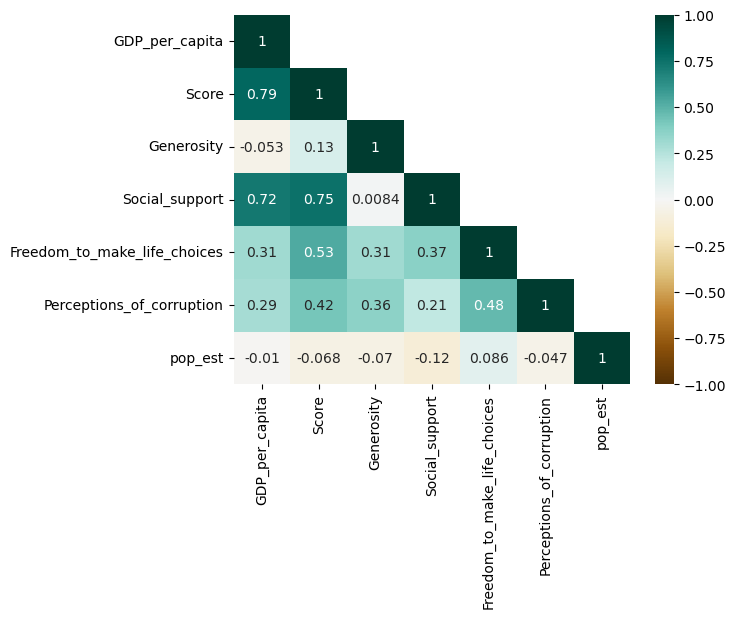

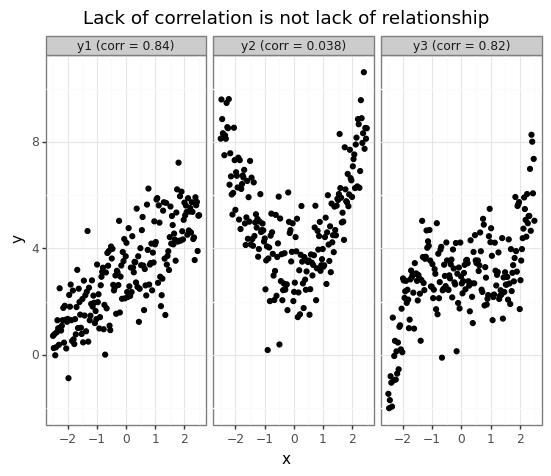

<ggplot: (80137124081)>

In [11]:
x_data = np.linspace(-2.5, 2.5, 200)
y_data1 = x_data + 3.0 + np.random.normal(size=200)
y_data2 = x_data**2 + 3.0 + np.random.normal(size=200)
y_data3 = 0.05*x_data**5 + 3.0 + np.random.normal(size=200)

df = pd.DataFrame({"x" : x_data, "y1 (corr = 0.84)" : y_data1, "y2 (corr = 0.038)" : y_data2, "y3 (corr = 0.82)" : y_data3})
data_plot = df.melt(id_vars = ["x"], value_vars=["y1 (corr = 0.84)", "y2 (corr = 0.038)", "y3 (corr = 0.82)"], value_name="y", var_name="Dataset")

p = (ggplot(data_plot, aes("x", "y"))
    + geom_point()
    + facet_wrap("~Dataset")
    + labs(title = "Lack of correlation is not lack of relationship")
    + theme_bw())

p.save("Figs/Ex_corr_fail.png", width=BASE_WIDTH*2.0, height=BASE_HEIGHT)

p

Another way to handle associations between several variables is to use parallel coordinates. Again, by several good reasons the functionality for this is not supported by ggplot, so we will use plotly.

In [12]:
import plotly.graph_objects as go

data_plot = data_2018
fig = go.Figure(data= 
        go.Parcoords(
                dimensions = list([
                        dict(values = data_plot["Freedom_to_make_life_choices"], label="Freedom to make life choices"),
                        dict(range=[0, data_plot['cont_num'].max()],
                             values = data_plot["cont_num"], label="Continent", 
                             tickvals = [0, 1, 2, 3, 4, 5], ticktext = ["Africa", "North America", "Asia", "South America", "Europe", "Oceania"]), 
                        dict(values = data_plot["Perceptions_of_corruption"], label="Perceptions of corruption"),
                        dict(values = data_plot["Score"], label="Happiness score")]),
                line = dict(color = data_plot['cont_num'], 
                            colorscale = [[0, cbPalette[0]],[0.2, cbPalette[1]],[0.4, cbPalette[2]], [0.6, cbPalette[3]], [0.8, cbPalette[4]], [1.0, cbPalette[5]]])
))

fig.write_image("Figs/Coordinate_plot.png")
fig.show()

Another special form of data is Paired data, where we measure the same variable under the same conditions. Here the most efficient approach is a simple line plot with a separating diagonal line.

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning:

Saving 7.0 x 5 in image.

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning:

Filename: Figs/Salary_v1.png

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning:

Saving 7.0 x 5 in image.

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning:

Filename: Figs/Salary_v2.png



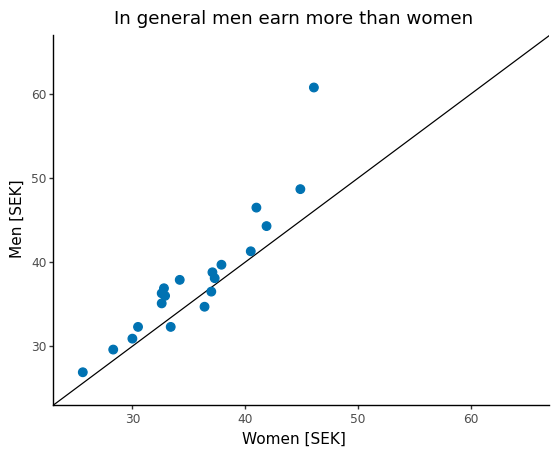

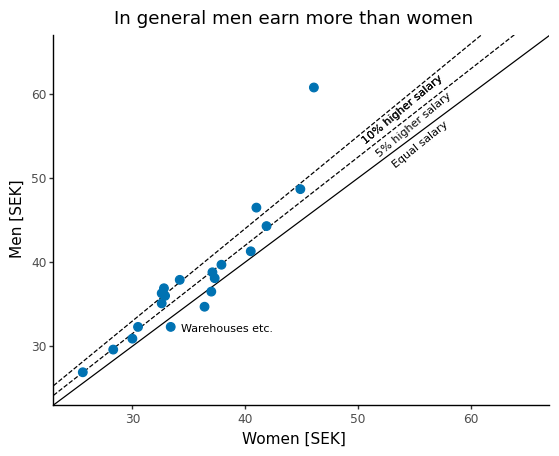

[<ggplot: (80137258433)>, <ggplot: (80137356352)>]

In [13]:
data_salary = pd.read_csv("Data/Salary_sweden.csv")
data_salary["men"] = data_salary["men"] / 1000
data_salary["women"] = data_salary["women"] / 1000

p1 = (ggplot(data_salary, aes(y="men", x="women")) 
  + geom_abline(intercept = 0, slope=1) 
  + geom_point(color = cbPalette[3], size=3.0) 
  + labs(y = "Men [SEK]", x = "Women [SEK]", title = "In general men earn more than women")
  + xlim(25, 65) 
  + ylim(25, 65) 
  + theme_classic())


p2 = (ggplot(data_salary, aes(y="men", x="women")) 
  + geom_abline(intercept = 0, slope=1) 
  + geom_abline(intercept = 0, slope=1.05, linetype="dashed") 
  + geom_abline(intercept = 0, slope=1.1, linetype="dashed") 
  + geom_point(color = cbPalette[3], size=3.0) 
  + annotate("text", x = 55.5, y = 51.5*1.05, label = "Equal salary", size=8.0, angle=39)
  + annotate("text", x = 55, y = 53.8*1.05, label = "5% higher salary", size=8.0, angle=40.1)
  + annotate("text", x = 54, y = 53*1.1, label = "10% higher salary", size=8.0, angle=40)
  + annotate("text", x = 54, y = 53*1.1, label = "10% higher salary", size=8.0, angle=40)
  + annotate("text", x = 38.4, y = 32.2, label = "Warehouses etc.", size=8.0, angle=0)
  + labs(y = "Men [SEK]", x = "Women [SEK]", title = "In general men earn more than women")
  + xlim(25, 65) 
  + ylim(25, 65) 
  + theme_classic())


p1.save("Figs/Salary_v1.png", dpi=300, width=BASE_WIDTH, height=BASE_HEIGHT)
p2.save("Figs/Salary_v2.png", dpi=300, width=BASE_WIDTH, height=BASE_HEIGHT)

[p1, p2]